# [如何用Python做词云](http://www.jianshu.com/p/e4b24a734ccc)？
网上教你做信息图教程很多。许多都是利用了专用工具。这些工具好是好，便捷而强大。只是它们功能都太过专一，适用范围有限。今天我们要尝试的，是用通用的编程语言Python来做词云。

如果你之前没有编程基础，没关系,从零开始，意味着我会教你如何安装Python运行环境，一步步完成词云图。希望你不要限于浏览，而是亲自动手尝试一番。到完成的那一步，你不仅可以做出第一张词云图，而且这还将是你的第一个有用的编程作品。

开始之前，你需要安装：
`pip install wordcloud`

## 数据

词云分析对象，是文本。为了简便，我们这里[以英文文本为例](https://www.coursera.org/learn/machine-learning)。

In [1]:
# 读取英文文本内容
filename = "wordcloud.txt"
mytext = open(filename).read()
print(mytext[0:99]) #全部 print 出来太多了

Could North Korean, US threats of destruction cause an accidental war?

(CNN)The war of words betwe


Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

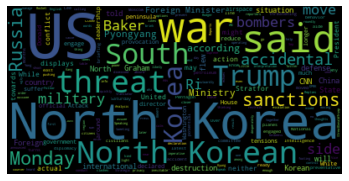

In [2]:
# 呼唤(import)词云包，利用mytext中存储的文本内容来制造词云。
from wordcloud import WordCloud
wordcloud = WordCloud().generate(mytext)

# 此时词云分析已经完成了。

%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [3]:
# 英文文本不够给力？来段中文的 PS：难度大一点，来段古文：增广贤文

filename = "wordcloudChinese.txt"
mytext = open(filename).read()
print("先预览一下古文头几句:  "+mytext[0:99])

# 注意，由于英文词与词自带空格作为分隔符，相比于中文分词要简单的多。我们在做中文分词时，需要把词语从一整段话中筛出来，困难之处在于，汉语表达博大精深，一段话往往有不同的切分方法。
# 所幸这不是我们需要担心的，Python中的Jieba库提供了现成的解决方案：
import jieba
result=" ".join(jieba.cut(mytext))

# jiaba调用了自己的分词算法，将切分好的文本按逗号分隔符分开，得到下面结果
print("切分结果:  "+result[0:99])

Building prefix dict from the default dictionary ...
先预览一下古文头几句:  增广贤文

昔时贤文,诲汝谆谆。集韵增广,多见多闻。
观今宜鉴古,无古不成今。
知己知彼,将心比心。
酒逢知己饮,诗向会人吟。相识满天下,知心能几人？
相逢好似初相识,到老终无怨恨心。
近水知鱼性,
Loading model from cache C:\Users\YAO\AppData\Local\Temp\jieba.cache
Loading model cost 1.072 seconds.
Prefix dict has been built successfully.
切分结果:  增 广贤文 
 
 昔时 贤文 , 诲 汝 谆谆 。 集韵 增广 , 多见 多闻 。 
 观今 宜鉴 古 , 无古 不成 今 。 
 知己知彼 , 将心比心 。 
 酒逢知己 饮 , 诗向会 人吟 


Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

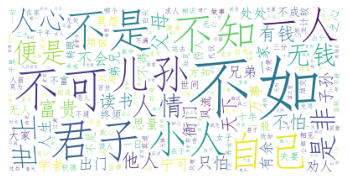

In [4]:
# 做好了中文分词，下一步即是绘制云词图了。这里我们使用了另一个比较强大的库WordCloud。

from wordcloud import WordCloud
wc = WordCloud(
    background_color="white", #背景颜色
    max_words=200, #显示最大词数
    font_path=r"C:\Windows\Fonts\simfang.ttf",  #使用字体
    ).generate(result)
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wc)
plt.axis("off")

In [5]:
image_binary = wc.to_image()
import io,base64
from urllib.parse import quote
from flask import Flask,send_file
app = Flask(__name__)

@app.route('/')
def word_cloud(is_debug = '1'):
    img = wc.to_image()
    output_buffer = io.BytesIO()
    img.save(output_buffer, format='png')

    if is_debug == '1':
        # image file response
        output_buffer.seek(0)
        return send_file(output_buffer, mimetype='image/png', attachment_filename='your.png', as_attachment=True)
    # base64 image string response
    binary_data = output_buffer.getvalue()
    base64_data = base64.b64encode(binary_data)
    image_64 = 'data:image/png;base64,' + quote(base64_data)
    return image_64

if __name__ == '__main__':
    app.run()

* Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


emmmmmmmm

# 古人说得对